# Day 16: Proboscidea Volcanium

https://adventofcode.com/2022/day/16
    
## The problem
You're in a volcano with an estimated time of 30 minutes until it erupts. Release the maximum possible amount of pressure using these valves. It takes one minute to travel between valves and one minute to open a valve. Start at AA. Go!

Select example or puzzle.

In [1]:
example = False

<hr>

## Import data

In [2]:
if example:
    given = '''Valve AA has flow rate=0; tunnels lead to valves DD, II, BB
Valve BB has flow rate=13; tunnels lead to valves CC, AA
Valve CC has flow rate=2; tunnels lead to valves DD, BB
Valve DD has flow rate=20; tunnels lead to valves CC, AA, EE
Valve EE has flow rate=3; tunnels lead to valves FF, DD
Valve FF has flow rate=0; tunnels lead to valves EE, GG
Valve GG has flow rate=0; tunnels lead to valves FF, HH
Valve HH has flow rate=22; tunnel leads to valve GG
Valve II has flow rate=0; tunnels lead to valves AA, JJ
Valve JJ has flow rate=21; tunnel leads to valve II'''
    
else:
    given = '''Valve GS has flow rate=0; tunnels lead to valves KB, GW
Valve CB has flow rate=0; tunnels lead to valves GW, CT
Valve TP has flow rate=0; tunnels lead to valves LR, TH
Valve FI has flow rate=3; tunnels lead to valves DA, AY, ZO, MP, XP
Valve WV has flow rate=0; tunnels lead to valves TH, HG
Valve EA has flow rate=16; tunnels lead to valves PL, NG, AX
Valve AT has flow rate=9; tunnels lead to valves ZO, EM
Valve WS has flow rate=0; tunnels lead to valves GW, RD
Valve MP has flow rate=0; tunnels lead to valves AA, FI
Valve GE has flow rate=0; tunnels lead to valves AX, QN
Valve SA has flow rate=10; tunnels lead to valves NI, OM, RD, RC, GO
Valve NI has flow rate=0; tunnels lead to valves SA, YG
Valve GO has flow rate=0; tunnels lead to valves TH, SA
Valve IT has flow rate=0; tunnels lead to valves WB, KB
Valve NG has flow rate=0; tunnels lead to valves EA, KF
Valve RD has flow rate=0; tunnels lead to valves SA, WS
Valve LR has flow rate=12; tunnels lead to valves TP, XR
Valve TO has flow rate=22; tunnel leads to valve VW
Valve WF has flow rate=0; tunnels lead to valves XX, OO
Valve YD has flow rate=21; tunnel leads to valve NR
Valve XR has flow rate=0; tunnels lead to valves LR, KB
Valve KF has flow rate=0; tunnels lead to valves GW, NG
Valve OO has flow rate=0; tunnels lead to valves UD, WF
Valve HG has flow rate=0; tunnels lead to valves WV, YG
Valve CT has flow rate=0; tunnels lead to valves YG, CB
Valve DA has flow rate=0; tunnels lead to valves TH, FI
Valve YY has flow rate=0; tunnels lead to valves AA, YG
Valve VW has flow rate=0; tunnels lead to valves TO, EM
Valve RC has flow rate=0; tunnels lead to valves AA, SA
Valve PL has flow rate=0; tunnels lead to valves AA, EA
Valve TH has flow rate=14; tunnels lead to valves GO, WV, GJ, DA, TP
Valve QN has flow rate=24; tunnels lead to valves LC, GE
Valve XE has flow rate=0; tunnels lead to valves NA, XX
Valve XP has flow rate=0; tunnels lead to valves FI, OM
Valve AX has flow rate=0; tunnels lead to valves GE, EA
Valve EM has flow rate=0; tunnels lead to valves AT, VW
Valve NR has flow rate=0; tunnels lead to valves YD, PM
Valve YG has flow rate=4; tunnels lead to valves AY, HG, NI, YY, CT
Valve PM has flow rate=0; tunnels lead to valves UD, NR
Valve AY has flow rate=0; tunnels lead to valves YG, FI
Valve GJ has flow rate=0; tunnels lead to valves AA, TH
Valve LC has flow rate=0; tunnels lead to valves QN, GW
Valve UD has flow rate=17; tunnels lead to valves OO, PM
Valve AA has flow rate=0; tunnels lead to valves MP, GJ, YY, RC, PL
Valve OM has flow rate=0; tunnels lead to valves XP, SA
Valve WB has flow rate=0; tunnels lead to valves NA, IT
Valve GW has flow rate=11; tunnels lead to valves KF, GS, LC, CB, WS
Valve NA has flow rate=7; tunnels lead to valves WB, XE
Valve XX has flow rate=20; tunnels lead to valves XE, WF
Valve ZO has flow rate=0; tunnels lead to valves AT, FI
Valve KB has flow rate=8; tunnels lead to valves XR, GS, IT'''



Tabulate the given info.

In [3]:
import pandas as pd

def organize_info(infostr):
    lines = given.split('\n')
    table = []
    columns = ['label', 'status', 'rate', 'leads_to']
    for line in lines:
        line = line.replace(',', '')
        word = line.split()
        row = []
        row.append(word[1])
        row.append('closed')
        row.append(int(word[4][5:-1]))
        row.append(word[9:])
        table.append(row)
    df = pd.DataFrame(table, columns = columns)
    return df

info = organize_info(given)

#info = info.sort_values(by='rate', ascending=False).reset_index()
info

,label,status,rate,leads_to
0,GS,closed,0,"[KB, GW]"
1,CB,closed,0,"[GW, CT]"
2,TP,closed,0,"[LR, TH]"
3,FI,closed,3,"[DA, AY, ZO, MP, XP]"
4,WV,closed,0,"[TH, HG]"
5,EA,closed,16,"[PL, NG, AX]"
6,AT,closed,9,"[ZO, EM]"
7,WS,closed,0,"[GW, RD]"
8,MP,closed,0,"[AA, FI]"
9,GE,closed,0,"[AX, QN]"


## Visualize the network

Looks like another network graph problem. Edges are undirected, but nodes have values that decrease over time.

igraph documentation: https://igraph.readthedocs.io/en/stable/tutorial.html

In [4]:
import igraph as ig

g = ig.Graph()
g.add_vertices(info['label'].tolist())

edges = info.apply(lambda x: [[x.label, valve] for valve in x.leads_to], axis=1)

for row in edges:
    g.add_edges(row)
    
g.simplify()

print(g)

IGRAPH UN-- 51 60 --
+ attr: name (v)
+ edges (vertex names):
GS--GW, GS--KB, CB--CT, CB--GW, TP--LR, TP--TH, FI--MP, FI--DA, FI--XP,
FI--AY, FI--ZO, WV--HG, WV--TH, EA--NG, EA--PL, EA--AX, AT--EM, AT--ZO,
WS--RD, WS--GW, MP--AA, GE--QN, GE--AX, SA--NI, SA--GO, SA--RD, SA--RC,
SA--OM, NI--YG, GO--TH, IT--WB, IT--KB, NG--KF, LR--XR, TO--VW, WF--OO,
WF--XX, YD--NR, XR--KB, KF--GW, OO--UD, HG--YG, CT--YG, DA--TH, YY--YG,
YY--AA, VW--EM, RC--AA, PL--AA, TH--GJ, QN--LC, XE--NA, XE--XX, XP--OM,
NR--PM, YG--AY, PM--UD, GJ--AA, LC--GW, WB--NA


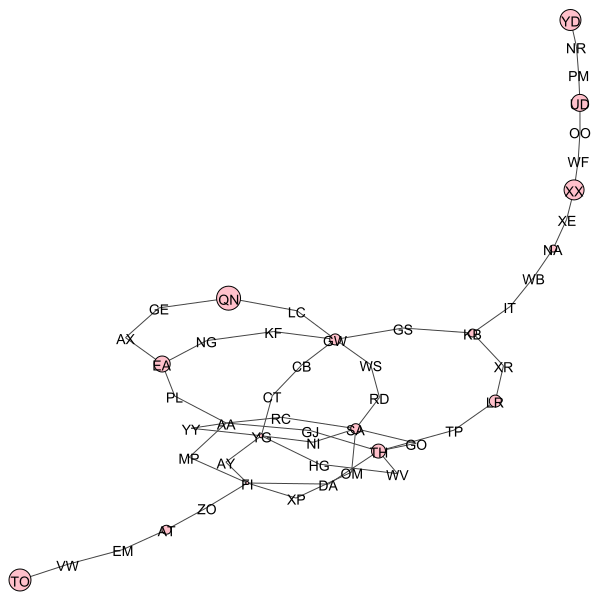

In [5]:
layout = g.layout("kk")

g.vs["label"] = g.vs["name"]
g.vs["size"] = info['rate']
g.vs['color'] = 'pink'
# https://en.wikipedia.org/wiki/X11_color_names

ig.plot(g, layout=layout)

Well, at least now we've visualized the problem. This graph definitely helps me as a human to pick a reasonable way. But I need the BEST way. We're in a volcano, after all! With a herd of distressed elephants! And it's not clear from igraph documentation that it includes analysis tools that can deal with the value of the nodes, which decrease as we traverse the network. So I decided to read about other packages. Maybe there's a better match.

Going back to our list of libraries from the hill climbing day, let's consider NetworkX: https://networkx.org/documentation/stable/

The problem at hand seems like a variation of the traveling salesman problem, so let's start here: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.approximation.traveling_salesman.traveling_salesman_problem.html 

There's still no mention of node values and I haven't found anything promising in Google, (this is a good description of the problem, but nobody answered it https://math.stackexchange.com/questions/2062969/adjusting-the-travelling-salesman-problem-for-weighted-nodes) so let's try making up some greedy algorithm of our own. (Hey, it could work, and the elephants are expecting me to do something.)

In [6]:
position = 'AA' 
timeleft = 30
info['distance'] = g.distances(source=position, target=info.label)[0]
info['value'] = (info.status=='closed').astype(int) * info.rate * (timeleft - info.distance)
info = info.sort_values(by='rate', ascending=False).reset_index()
#info

## Strategy 1

1. Define the value of each closed node, at time t, as the total amount of pressure it could release by the deadline if we went straight there and opened it.

    value(valve) = flow rate * (minutes left - length of shortest path)
    

2. Define the overall goodness of our current situation as the sum of all our options.

    goodness = sum(valve values)
    

3. Define the benefit of opening the valve where we are (rate * minutes left) and the cost of doing so (rate of all closed valves * 1 minute) 


4. Compare, for each exit tunnel, the impact on overall goodness if we went that way, and choose the one that offers the best prospect. Remember, we only have 30 minutes.


    
<hr>

Consider the initial goodness at our starting position, 'AA'.

In [7]:
position = 'AA'
timeleft = 30

info['distance'] = g.distances(source=position, target=info.label)[0]
info['value'] = (info.status=='closed').astype(int) * info.rate * (timeleft - info.distance)
goodness = sum(info.value)

print('Goodness: ', goodness)
#info

Goodness:  4507


Open the valve if it's worth the time to do so.

In [8]:
def should_open(position, timeleft):
    status = info.loc[info.label==position, 'status'].values[0]
    rate = info.loc[info.label==position, 'rate'].values[0]
    benefit = rate * timeleft
    cost = sum(info.rate)
    return (benefit > cost) & (status=='closed')


if should_open(position, timeleft):
    print('Open valve', position)
    info.loc[info.label==position, 'status'] = 'open'
    timeleft -= 1
    info['value'] = (info.status=='closed').astype(int) * info.rate * (timeleft - info.distance)

print(timeleft, 'seconds left!')


30 seconds left!


Compare the available tunnels.

In [9]:
def goodness(position, timeleft):
    info['distance'] = g.distances(source=position, target=info.label)[0]
    info['value'] = info.rate * (timeleft - info.distance)
    goodness = sum(info.value)
    return goodness


def compare_tunnels(position, timeleft):
    situation = {}
    tunnels = info.loc[info.label==position, 'leads_to'].values.tolist()[0]
    for option in tunnels:
        situation[option] = goodness(option, timeleft - 1)
    options = pd.DataFrame.from_dict(situation, orient='index', columns=['goodness'])
    return options


opt = compare_tunnels(position, timeleft)
best = opt[opt.goodness==max(opt.goodness)].index[0]

print('Best option:', best)
opt

Best option: GJ


,goodness
MP,4179
GJ,4309
YY,4214
RC,4226
PL,4286


Take the best tunnel!

In [10]:
position = best
timeleft -=1

info['distance'] = g.distances(source=position, target=info.label)[0]
info['value'] = (info.status=='closed').astype(int) * info.rate * (timeleft - info.distance)

print(timeleft, 'seconds left!')


29 seconds left!


In [11]:
if should_open(position, timeleft):
    print('Open valve', position)
    info.loc[info.label==position, 'status'] = 'open'
    timeleft -= 1
    info['value'] = (info.status=='closed').astype(int) * info.rate * (timeleft - info.distance)

print(timeleft, 'seconds left!')


29 seconds left!


In [12]:
opt = compare_tunnels(position, timeleft)
best = opt[opt.goodness==max(opt.goodness)].index[0]

print('Best option:', best)
opt

Best option: TH


,goodness
AA,4111
TH,4225


Beyond here, my algorithm bounces back and forth between AA and DD ad infinitum for the example. The example goes from DD to CC. Need a better strategy. But maybe it will work on my puzzle data? Can't hurt to try.

OK, I tried. On my puzzle data it gets stuck, too, between KB and GS.

## Strategy 2

Just try all the paths recursively I guess. Use the same logic to decide whether or not to open the valve.

Notes: keep track of the pressure that's flowing after you open valves. Use it to score the value of the path you're on...

In [13]:

def should_open(position, timeleft):
    status = info.loc[info.label==position, 'status'].values[0]
    rate = info.loc[info.label==position, 'rate'].values[0]
    benefit = rate * timeleft
    cost = sum(info.rate) # oops, this should only count the closed valves...
    return (benefit > cost) & (status=='closed')

def act(position, timeleft, path):
    path.append(position)
    print('Path:', path)
    relieve = sum(info.flowing)
    print('flowing:', relieve)
    if should_open(position, timeleft):
        info.loc[info.label==position, 'status'] = 'open'
        timeleft -= 1
        print('Opened valve', position)
        info['value'] = (info.status=='closed').astype(int) * info.rate * (timeleft)
        info['flowing'] = (info.status=='open').astype(int) * info.rate * (timeleft)

    timeleft -= 1
    print(timeleft, 'seconds left!')
    
    if timeleft <= 0:
        return path
    else:
        tunnels = info.loc[info.label==position, 'leads_to'].values.tolist()[0]
        for tunnel in tunnels:
            path = act(tunnel, timeleft, path)

    
position = 'AA'
timeleft = 30

info['value'] = (info.status=='closed').astype(int) * info.rate * (timeleft)
# total amount of pressure that could be released by a closed valve if you could open it now
info['flowing'] = (info.status=='open').astype(int) * info.rate * (timeleft)

tunnels = info.loc[info.label==position, 'leads_to'].values.tolist()[0]

for tunnel in tunnels:
    path = act(tunnel, timeleft, [position])

    

Path: ['AA', 'MP']
flowing: 0
29 seconds left!
Path: ['AA', 'MP', 'AA']
flowing: 0
28 seconds left!
Path: ['AA', 'MP', 'AA', 'MP']
flowing: 0
27 seconds left!
Path: ['AA', 'MP', 'AA', 'MP', 'AA']
flowing: 0
26 seconds left!
Path: ['AA', 'MP', 'AA', 'MP', 'AA', 'MP']
flowing: 0
25 seconds left!
Path: ['AA', 'MP', 'AA', 'MP', 'AA', 'MP', 'AA']
flowing: 0
24 seconds left!
Path: ['AA', 'MP', 'AA', 'MP', 'AA', 'MP', 'AA', 'MP']
flowing: 0
23 seconds left!
Path: ['AA', 'MP', 'AA', 'MP', 'AA', 'MP', 'AA', 'MP', 'AA']
flowing: 0
22 seconds left!
Path: ['AA', 'MP', 'AA', 'MP', 'AA', 'MP', 'AA', 'MP', 'AA', 'MP']
flowing: 0
21 seconds left!
Path: ['AA', 'MP', 'AA', 'MP', 'AA', 'MP', 'AA', 'MP', 'AA', 'MP', 'AA']
flowing: 0
20 seconds left!
Path: ['AA', 'MP', 'AA', 'MP', 'AA', 'MP', 'AA', 'MP', 'AA', 'MP', 'AA', 'MP']
flowing: 0
19 seconds left!
Path: ['AA', 'MP', 'AA', 'MP', 'AA', 'MP', 'AA', 'MP', 'AA', 'MP', 'AA', 'MP', 'AA']
flowing: 0
18 seconds left!
Path: ['AA', 'MP', 'AA', 'MP', 'AA', 'MP

AttributeError: 'NoneType' object has no attribute 'append'

How am I going to avoid going in circles? I think I need to divide the graph into sub-graphs. Not sure how to do that programmatically. 

## Strategy 3

Eventually (two days later) I just tried a number of paths by hand. At least the graph layout helped.

The optimal path went through EA, QN, GW, and then out towards YD, turning on every valve along the way. 1775 total pressure released. Gold star. Done. I spent a lot of time with a pencil and calculator... the spreadsheet was faster and more accurate.

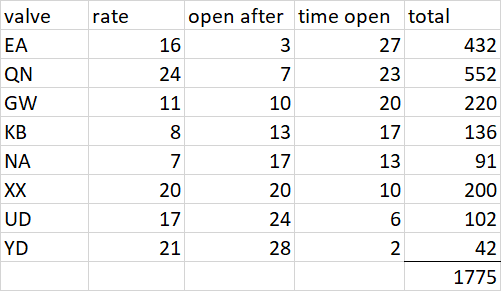

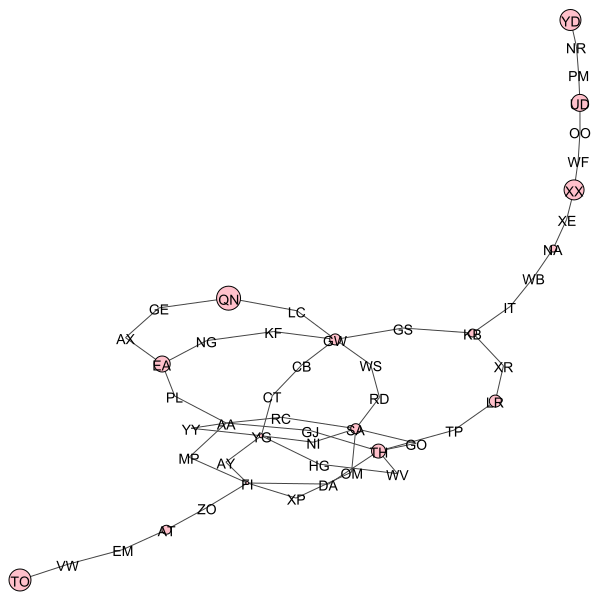

In [14]:
ig.plot(g, layout=layout)

## Part 2

Working together with the elephant, one of us headed out towards YD via the shortest path, through TH and LR, opening every valve. The other looped up through QN and down to TO, opening the medium-sized valves but skipping the tiny ones.

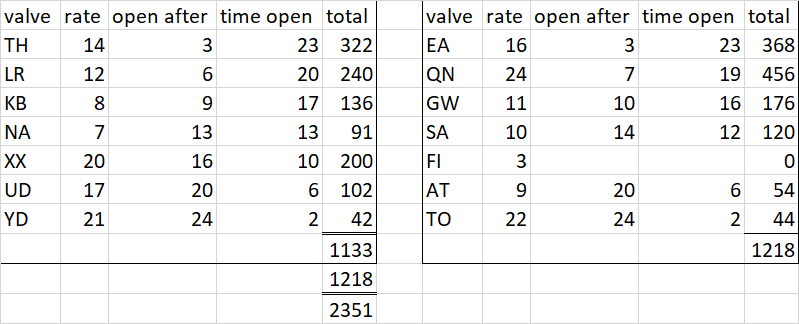